The purpose of this notebook is to implement different advanced regression models and to select the most suitable model for the dataset based on Mean Squared Error and R-squared score.

In [82]:
import pandas as pd
import numpy as np

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import itertools

##models
##baseline model - LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [77]:
##import train and test datasets
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_test.info()

In [35]:
## df_final is the preprocessed dataset for training models
df_train = pd.read_csv('df_final.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   OverallQual           1460 non-null   int64
 1   YearBuilt             1460 non-null   int64
 2   YearRemodAdd          1460 non-null   int64
 3   BsmtFinSF1            1460 non-null   int64
 4   TotalBsmtSF           1460 non-null   int64
 5   1stFlrSF              1460 non-null   int64
 6   2ndFlrSF              1460 non-null   int64
 7   GrLivArea             1460 non-null   int64
 8   BsmtFullBath          1460 non-null   int64
 9   FullBath              1460 non-null   int64
 10  HalfBath              1460 non-null   int64
 11  BedroomAbvGr          1460 non-null   int64
 12  TotRmsAbvGrd          1460 non-null   int64
 13  GarageCars            1460 non-null   int64
 14  GarageArea            1460 non-null   int64
 15  YrSold                1460 non-null   int64
 16  ExterQ

In [37]:
#Inputs to the model
X = df_train
y = df['SalePrice']
alpha = 1

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# List of regression models to evaluate
models = [
    ('Linear Regression baseline', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1)),
    ('Lasso Regression', Lasso(alpha=1)),
    ('LassoCV Regression',LassoCV(alphas=[18000,30000],cv=7))
]

results = pd.DataFrame(columns=['Model', 'MSE', 'R-squared'])

In [98]:
##train and predict using the models
results_list = []
for model_name, model in models:
    print(model)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, predictions)
    r_squared = round(r2_score(y_test, predictions),4)
    results_list.append({'Model': model_name, 'MSE': mse, 'R-squared': r_squared})
    
results = pd.DataFrame(results_list)
print(results)

LinearRegression()
Ridge(alpha=1)
Lasso(alpha=1)
LassoCV(alphas=[18000, 30000], cv=7)
                        Model           MSE  R-squared
0  Linear Regression baseline  1.022375e+09     0.8667
1            Ridge Regression  1.023143e+09     0.8666
2            Lasso Regression  1.022467e+09     0.8667
3          LassoCV Regression  1.741270e+09     0.7730


# Gradient Boost with hyperparameter tuning using GridSearchCV

In [110]:
#Gradient Boosting regressor
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = regressor.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

gb_r2 = round(r2_score(y_test, y_pred_gb),4)
print("R-squared:", r2)

results_list.append({'Model': 'GradientBoosting Regressor', 'MSE': gb_mse, 'R-squared': gb_r2})

Mean Squared Error: 1741270365.5204375
R-squared: 0.155


In [101]:
##fine-tuning gradient booster using GridSearchCV
gb_reg = GradientBoostingRegressor(random_state=42)

#hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gb_reg = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_gb_reg.predict(X_test)

# Evaluate the model
gbCV_mse = mean_squared_error(y_test, predictions)
gbCV_r2 = round(r2_score(y_test, predictions),4)

print(f"Best Gradient Boosting Regressor:\n{best_gb_reg}")
print(f"\nMean Squared Error (MSE): {gbCV_mse}")
print(f"R-squared: {gbCV_r2}")

Best Gradient Boosting Regressor:
GradientBoostingRegressor(max_depth=4, random_state=42)

Mean Squared Error (MSE): 805050764.3982036
R-squared: 0.895


# XGBoost regressor

In [105]:
# Create an XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=2)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = regressor.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse}')

xgb_r2 = round(r2_score(y_test, y_pred_xgb),4)
print("R-squared:", r2)

results_list.append({'Model': 'XGBoost Regressor', 'MSE': xgb_mse, 'R-squared': xgb_r2})

Mean Squared Error: 1741270365.5204375
R-squared: 0.155


# ElasticNet regression

In [106]:
# Create an ElasticNet regression model
elastic_net_model = ElasticNet(alpha=0.8, l1_ratio=0.5)  
# Train the model
elastic_net_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test_scaled)

# Evaluate the model
en_mse = mean_squared_error(y_test, y_pred)
en_r2 = round(r2_score(y_test, y_pred),4)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

results_list.append({'Model': 'ElasticNet Regressor', 'MSE': en_mse, 'R-squared': en_r2})

Mean Squared Error: 1741270365.5204375
R-squared: 0.155


# SVM

In [23]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Create an SVM regression model
svm_model = SVR(kernel='linear', C=1.0)  # You can experiment with different kernels (linear, rbf, poly, etc.) and hyperparameters

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = round(r2_score(y_test, y_pred),4)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

results_list.append({'Model': 'SVM', 'MSE': svm_mse, 'R-squared': svm_r2})

Mean Squared Error: 1741270365.5204375
R-squared: 0.155


# Consolidation of results

In [111]:
results = pd.DataFrame(results_list)
print(results)

                        Model           MSE  R-squared
0  Linear Regression baseline  1.022375e+09     0.8667
1            Ridge Regression  1.023143e+09     0.8666
2            Lasso Regression  1.022467e+09     0.8667
3          LassoCV Regression  1.741270e+09     0.7730
4           XGBoost Regressor  7.822565e+08     0.8980
5        ElasticNet Regressor  1.108433e+09     0.8555
6                         SVM  6.481271e+09     0.1550
7  GradientBoosting Regressor  6.481271e+09     0.8915


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Linear Regression baseline'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Lasso Regression'),
  Text(3, 0, 'LassoCV Regression'),
  Text(4, 0, 'XGBoost Regressor'),
  Text(5, 0, 'ElasticNet Regressor'),
  Text(6, 0, 'SVM'),
  Text(7, 0, 'GradientBoosting Regressor')])

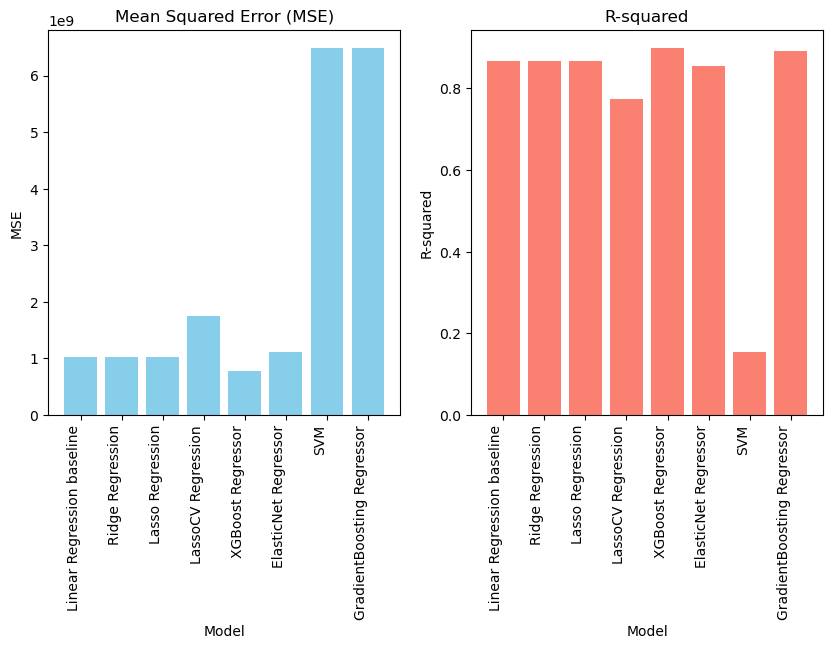

In [112]:
# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars_mse = plt.bar(results['Model'], results['MSE'], color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=90, ha='right')

# Plotting R-squared
plt.subplot(1, 2, 2)
bars_r_squared = plt.bar(results['Model'], results['R-squared'], color='salmon')
plt.title('R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=90, ha='right')